In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import math

In [52]:
data = pd.read_csv("train_data_set_1128.csv")

In [53]:
del data['Unnamed: 0']
del data['Unnamed: 0.1']
data.head()

,patnum,fdate,idate,pdate,ncites,xi,renewal_cnt,num_claims,iss_duration,age,Num_Inventor,num_bcit
0,6208775,6/22/99,3/27/01,1/3/02,0,0.579550,0,6,644,3793,1.0,3.0
1,6232247,10/4/99,5/15/01,5/31/01,8,5.658767,3,34,589,3744,2.0,7.0
2,6234712,12/4/99,5/22/01,10/11/01,3,7.215693,3,27,535,3737,4.0,3.0
3,6245142,1/12/99,6/12/01,5/24/01,65,20.183134,3,12,882,3716,5.0,42.0
4,6256247,12/19/00,7/3/01,8/9/01,77,14.787725,3,22,196,3695,1.0,4.0


In [54]:
data.corr()

,patnum,ncites,xi,renewal_cnt,num_claims,iss_duration,age,Num_Inventor,num_bcit
patnum,1.000000,-0.310036,-0.008478,-0.600998,-0.046683,0.432328,-0.999596,0.024864,0.096334
ncites,-0.310036,1.000000,0.020752,0.248692,0.147792,-0.092116,0.311009,0.035284,0.088574
xi,-0.008478,0.020752,1.000000,0.002113,0.064640,0.012725,0.007093,0.060887,0.047257
renewal_cnt,-0.600998,0.248692,0.002113,1.000000,0.080064,-0.269327,0.597915,-0.028399,-0.038387
num_claims,-0.046683,0.147792,0.064640,0.080064,1.000000,0.089719,0.047127,0.032995,0.131963
iss_duration,0.432328,-0.092116,0.012725,-0.269327,0.089719,1.000000,-0.432857,0.018917,0.070028
age,-0.999596,0.311009,0.007093,0.597915,0.047127,-0.432857,1.000000,-0.024924,-0.096484
Num_Inventor,0.024864,0.035284,0.060887,-0.028399,0.032995,0.018917,-0.024924,1.000000,0.088712
num_bcit,0.096334,0.088574,0.047257,-0.038387,0.131963,0.070028,-0.096484,0.088712,1.000000


In [55]:
target = data['xi']
del data['xi']

In [56]:
del data['idate']
del data['pdate']
del data['fdate']
data.head()

,patnum,ncites,renewal_cnt,num_claims,iss_duration,age,Num_Inventor,num_bcit
0,6208775,0,0,6,644,3793,1.0,3.0
1,6232247,8,3,34,589,3744,2.0,7.0
2,6234712,3,3,27,535,3737,4.0,3.0
3,6245142,65,3,12,882,3716,5.0,42.0
4,6256247,77,3,22,196,3695,1.0,4.0


In [57]:
data = data.set_index(['patnum'])
data.head()

,ncites,renewal_cnt,num_claims,iss_duration,age,Num_Inventor,num_bcit
patnum,,,,,,,
6208775,0,0,6,644,3793,1.0,3.0
6232247,8,3,34,589,3744,2.0,7.0
6234712,3,3,27,535,3737,4.0,3.0
6245142,65,3,12,882,3716,5.0,42.0
6256247,77,3,22,196,3695,1.0,4.0


In [55]:
del data['age']

In [60]:
#data = pd.get_dummies(data, columns=['renewal_cnt'])

In [9]:
data.head(n=10)

,ncites,renewal_cnt,num_claims,iss_duration,Num_Inventor,num_bcit
patnum,,,,,,
6208775,0,0,6,644,1.0,3.0
6232247,8,3,34,589,2.0,7.0
6234712,3,3,27,535,4.0,3.0
6245142,65,3,12,882,5.0,42.0
6256247,77,3,22,196,1.0,4.0
6258768,0,2,12,1055,1.0,10.0
6260529,5,1,12,158,12.0,32.0
6261218,1,3,13,959,1.0,10.0
6262077,1,0,10,186,1.0,1.0


In [74]:
data.corr()

,ncites,num_claims,iss_duration,Num_Inventor,num_bcit,renewal_cnt_0,renewal_cnt_1,renewal_cnt_2,renewal_cnt_3
ncites,1.000000,0.147792,-0.092116,0.035284,0.088574,-0.094190,-0.181178,0.251812,0.098250
num_claims,0.147792,1.000000,0.089719,0.032995,0.131963,-0.063010,-0.018528,0.069252,-0.003752
iss_duration,-0.092116,0.089719,1.000000,0.018917,0.070028,0.096618,0.209490,-0.289337,-0.072998
Num_Inventor,0.035284,0.032995,0.018917,1.000000,0.088712,0.020865,0.008214,-0.024737,-0.001249
num_bcit,0.088574,0.131963,0.070028,0.088712,1.000000,-0.006104,0.057365,-0.055647,-0.012620
renewal_cnt_0,-0.094190,-0.063010,0.096618,0.020865,-0.006104,1.000000,-0.458005,-0.259608,-0.034701
renewal_cnt_1,-0.181178,-0.018528,0.209490,0.008214,0.057365,-0.458005,1.000000,-0.723583,-0.096719
renewal_cnt_2,0.251812,0.069252,-0.289337,-0.024737,-0.055647,-0.259608,-0.723583,1.000000,-0.054823
renewal_cnt_3,0.098250,-0.003752,-0.072998,-0.001249,-0.012620,-0.034701,-0.096719,-0.054823,1.000000


In [20]:
#for columns in data:
 #   if (data[columns].sum() <=1):
       #      del data[columns]
           #     print columns

Num_Inventor_29.0
Num_Inventor_30.0
Num_Inventor_33.0
Num_Inventor_60.0
Num_Inventor_76.0


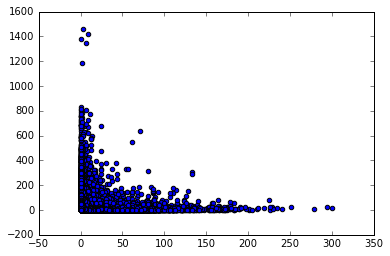

In [58]:
plt.scatter(data['ncites'],(target))

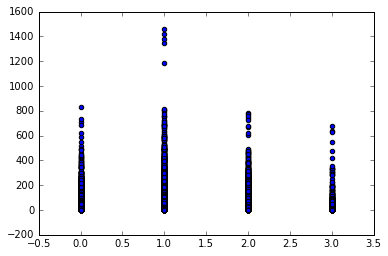

In [10]:
plt.scatter(data['renewal_cnt'],target)

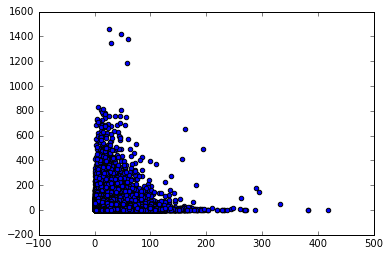

In [11]:
plt.scatter(data['num_claims'],target)

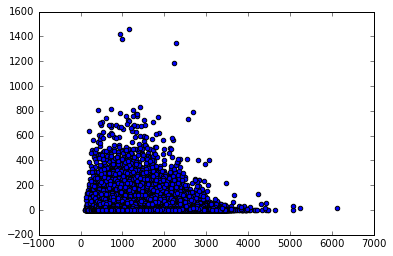

In [12]:
plt.scatter(data['iss_duration'],target)

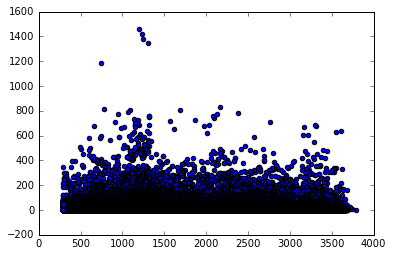

In [13]:
plt.scatter(data['age'],target)

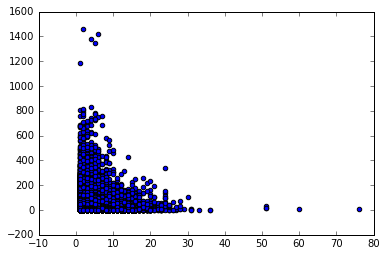

In [14]:
plt.scatter(data['Num_Inventor'],target)

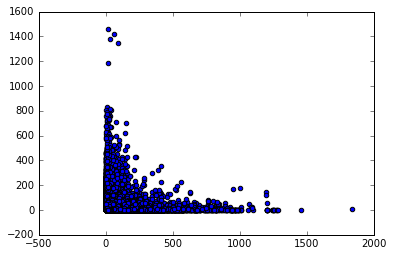

In [15]:
plt.scatter(data['num_bcit'],target)

In [7]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, normalize
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [96]:
data_train, data_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

In [78]:
pipeline1 = make_pipeline(RobustScaler(), PolynomialFeatures(), Ridge())
pipeline2 = make_pipeline(RobustScaler(), PolynomialFeatures(), Ridge())
pipeline3 = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())
pipeline4 = make_pipeline(RobustScaler(), PolynomialFeatures(), LinearRegression())
pipeline5 = make_pipeline(StandardScaler(), PolynomialFeatures(), KNeighborsRegressor())
pipeline6 = make_pipeline(RobustScaler(), PolynomialFeatures(), KNeighborsRegressor())
pipeline7 = make_pipeline(StandardScaler(), PolynomialFeatures(), Lasso())
pipeline8 = make_pipeline(RobustScaler(), PolynomialFeatures(), Lasso())
pipeline9 = make_pipeline(StandardScaler(), KernelRidge())
pipeline9 = make_pipeline(RobustScaler(), KernelRidge())
pipeline10 = make_pipeline(StandardScaler(), SVR())
pipeline11 = make_pipeline(RobustScaler(), SVR())

In [85]:
Rdg = RidgeCV(alphas=(0.1, 1.0, 1000.0), fit_intercept=True, normalize=True, scoring=None, cv=None, gcv_mode=None, 
              store_cv_values=False)
model = Rdg.fit(data_train,y_train)

In [86]:
model.coef_

array([  3.07538969e-02,   1.08711192e-01,   8.44232603e-05,
         6.88948512e-01,   1.81028807e-02,  -5.32510061e-01,
         5.40639172e-01,  -5.54553547e-01,   6.26513631e+00])

In [87]:
y_train_pred = model.predict(data_train)
y_train_pred.reshape(-1,1).shape

(231417L, 1L)

In [88]:
y_train.reshape(-1,1).shape

(231417L, 1L)

In [89]:
model.score(data_train, y_train)

0.0100400789838061

In [90]:
model.score(data_test, y_test)

0.0094348495619247519

In [91]:
grid1 = GridSearchCV(pipeline1, param_grid={'polynomialfeatures__degree': [2, 3],'ridge__alpha':[100.0, 1000.0]}, cv=10)
grid1.fit(data_train,y_train)
print('best parameters:', grid1.best_params_)
print('best score:', grid1.best_score_)
print('test score:', grid1.score(data_test, y_test))

('best parameters:', {'ridge__alpha': 100.0, 'polynomialfeatures__degree': 2})
('best score:', 0.011872400631113679)
('test score:', 0.011719179375715649)


In [119]:
knr = KNeighborsRegressor(n_neighbors=20, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
model_n = knr.fit(data_train, y_train)

In [120]:
model_n.score(data_train,y_train)

0.99765588472081457

In [121]:
model_n.score(data_test,y_test)

-0.039249575378659696

In [56]:
data_train, data_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

In [26]:
from sklearn.tree import DecisionTreeRegressor
data_train_trans = StandardScaler().fit_transform(data_train)
data_test_trans = StandardScaler().fit_transform(data_test)
dtr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, max_features='sqrt', random_state=None, max_leaf_nodes=None, 
                            min_impurity_split=1e-07, presort=False)
model_tree = dtr.fit(data_train_trans,y_train)
print(model_tree.score(data_train_trans,y_train))
print(model_tree.score(data_test_trans,y_test))

0.998968175964
-0.993917495413


In [22]:
pipeline_tree = make_pipeline(RobustScaler(),DecisionTreeRegressor())
grid_tree = GridSearchCV(pipeline_tree, param_grid={'decisiontreeregressor__max_features':['auto', 'sqrt']}, cv=10)
grid_tree.fit(data_train,y_train)
print('best parameters:', grid_tree.best_params_)
print('best score:', grid_tree.best_score_)
print('test score:', grid_tree.score(data_test, y_test))

('best parameters:', {'decisiontreeregressor__max_features': 'sqrt'})
('best score:', -1.0236916546071599)
('test score:', -1.1730979408428102)


In [127]:
pipeline_opt = make_pipeline(KNeighborsRegressor(weights ='distance'))
grid_opt = GridSearchCV(pipeline_opt, param_grid={'kneighborsregressor__n_neighbors':[10, 20]}, cv=10)
grid_opt.fit(data_train,y_train)
print('best parameters:', grid_opt.best_params_)
print('best score:', grid_opt.best_score_)
print('test score:', grid_opt.score(data_test, y_test))

('best parameters:', {'kneighborsregressor__n_neighbors': 20})
('best score:', -0.036456432830682298)
('test score:', -0.036358205618815864)


In [58]:
data.head()

,ncites,renewal_cnt,num_claims,iss_duration,age,Num_Inventor,num_bcit
patnum,,,,,,,
6208775,0,0,6,644,3793,1.0,3.0
6232247,8,3,34,589,3744,2.0,7.0
6234712,3,3,27,535,3737,4.0,3.0
6245142,65,3,12,882,3716,5.0,42.0
6256247,77,3,22,196,3695,1.0,4.0


In [11]:
for columns in data:
    data[columns] = ((data[columns] - data[columns].mean())/data[columns].std())
print data.head()

           ncites  renewal_cnt  num_claims  iss_duration       age  \
patnum                                                               
6208775 -0.412252    -1.767088   -0.931569     -0.964389  2.642039   
6232247  0.581523     2.786208    1.180004     -1.070641  2.582821   
6234712 -0.039586     2.786208    0.652111     -1.174961  2.574362   
6245142  7.662170     2.786208   -0.479089     -0.504608  2.548983   
6256247  9.152833     2.786208    0.275044     -1.829860  2.523603   

         Num_Inventor  num_bcit  
patnum                           
6208775     -0.935802 -0.442136  
6232247     -0.419966 -0.355131  
6234712      0.611707 -0.442136  
6245142      1.127543  0.406163  
6256247     -0.935802 -0.420385  


In [28]:
data = pd.DataFrame(data)

In [33]:
del data['renewal_cnt']

In [53]:
data_train, data_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

In [39]:
pipeline_tree_2 = make_pipeline(DecisionTreeRegressor())
grid_tree_2 = GridSearchCV(pipeline_tree_2, param_grid={'decisiontreeregressor__max_features':['auto', 'sqrt']}, cv=10)
grid_tree_2.fit(data_train,y_train)
print('best parameters:', grid_tree_2.best_params_)
print('best score:', grid_tree_2.best_score_)
print('test score:', grid_tree_2.score(data_test, y_test))

('best parameters:', {'decisiontreeregressor__max_features': 'sqrt'})
('best score:', -1.0737706214201006)
('test score:', -1.0286213929853427)


In [43]:
pipeline_tree_3 = make_pipeline(KNeighborsRegressor(weights ='distance'))
grid_tree_3 = GridSearchCV(pipeline_tree_3, param_grid={'kneighborsregressor__n_neighbors':[10, 20]}, cv=10)
grid_tree_3.fit(data_train,y_train)
print('best parameters:', grid_tree_3.best_params_)
print('best score:', grid_tree_3.best_score_)
print('test score:', grid_tree_3.score(data_test, y_test))

('best parameters:', {'kneighborsregressor__n_neighbors': 20})
('best score:', -0.050034167858289721)
('test score:', -0.057178444199390333)


In [57]:
pipeline_4 = make_pipeline(RobustScaler(),PolynomialFeatures(),Ridge())
grid_ridge = GridSearchCV(pipeline_4, param_grid={'polynomialfeatures__degree': [2, 3],'ridge__alpha':[100.0, 1000.0]}, cv=10)
grid_ridge.fit(data_train,y_train)
print('best parameters:', grid_ridge.best_params_)
print('best score:', grid_ridge.best_score_)
print('test score:', grid_ridge.score(data_test, y_test))

('best parameters:', {'ridge__alpha': 1000.0, 'polynomialfeatures__degree': 3})
('best score:', 0.011387932216700062)
('test score:', 0.010984555030593257)


In [65]:
for columns in data:
    data[columns] = ((data[columns] - data[columns].mean())/data[columns].std())
data = pd.DataFrame(data)

In [59]:
target = np.log(target)

In [60]:
data_train, data_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

In [61]:
from sklearn.linear_model import ElasticNetCV
rs = RobustScaler(quantile_range=(25.0, 75.0))
data_train_trans = rs.fit_transform(data_train)
data_test_trans = rs.transform(data_test)
ev = ElasticNetCV(l1_ratio=0.1,eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, 
                  precompute='auto', max_iter=1000, tol=0.0001, cv=10, copy_X=True, verbose=0, n_jobs=1, 
                  positive=False, random_state=None, selection='cyclic')
model_ev = ev.fit(data_train_trans,y_train)
print(model_ev.score(data_train_trans, y_train))
print(model_ev.score(data_test_trans, y_test))

0.0475521247679
0.0444226382813


In [62]:
print (model_ev.coef_)
print (model_ev.intercept_)

[ 0.0399093  -0.00239855  0.38125453  0.07253242 -0.14347564  0.15510207
  0.0517768 ]
0.204041157465


In [63]:
pred_xi = np.exp(model_ev.predict(rs.transform(data)))
target = np.exp(target)

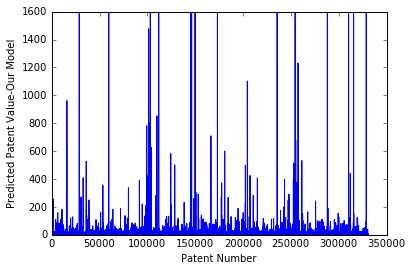

In [168]:
plt.plot(pred_xi)
axes = plt.gca()
axes.set_ylim([0,1600])
plt.ylabel('Predicted Patent Value-Our Model')
plt.xlabel('Patent Number')

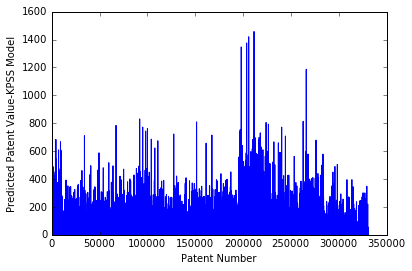

In [166]:
plt.plot(target)
axes_new = plt.gca()
axes_new.set_ylim([0,1600])
plt.ylabel('Predicted Patent Value-KPSS Model')
plt.xlabel('Patent Number')

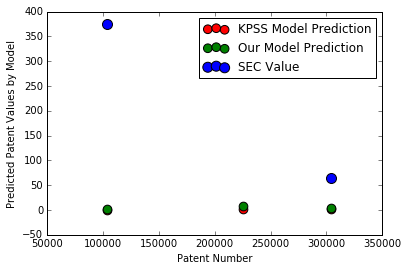

In [184]:
x = [103598,224918, 304635]
y1 = [target[103598],target[224918],target[304635]]
y2 = [pred_xi[103598],pred_xi[224918],pred_xi[304635]]
y3 = [375, 368, 65]
plt.scatter(x, y1, c='red', s = 75,label = 'KPSS Model Prediction' )
plt.scatter(x, y2,c='green', s= 75,label = 'Our Model Prediction')
plt.scatter(x, y3, c = 'blue', s= 100,label = 'SEC Value')
plt.ylabel('Predicted Patent Values by Model')
plt.xlabel('Patent Number')
plt.legend(loc='best')

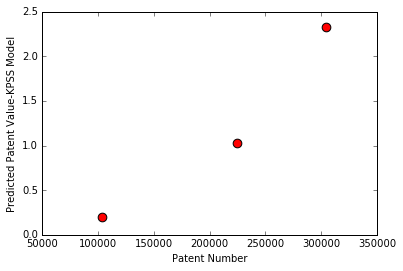

In [194]:
plt.scatter(x[0], y1[0], c='red', s = 75,label = 'KPSS Model Prediction' )
plt.scatter(x[1], y1[1], c='red', s = 75,label = 'KPSS Model Prediction' )
plt.scatter(x[2], y1[2], c='red', s = 75,label = 'KPSS Model Prediction' )
plt.ylabel('Predicted Patent Value-KPSS Model')
plt.xlabel('Patent Number')

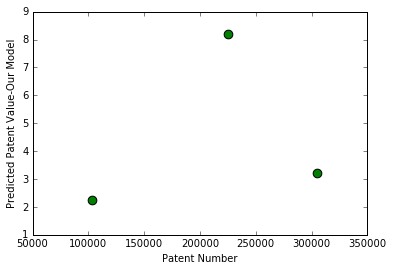

In [193]:
plt.scatter(x[0], y2[0], c='green', s = 75,label = 'KPSS Model Prediction' )
plt.scatter(x[1], y2[1], c='green', s = 75,label = 'KPSS Model Prediction' )
plt.scatter(x[2], y2[2], c='green', s = 75,label = 'KPSS Model Prediction' )
plt.ylabel('Predicted Patent Value-Our Model')
plt.xlabel('Patent Number')

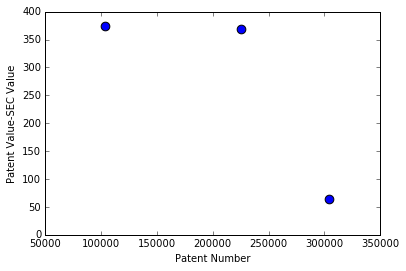

In [195]:
plt.scatter(x[0], y3[0], c='blue', s = 75,label = 'KPSS Model Prediction' )
plt.scatter(x[1], y3[1], c='blue', s = 75,label = 'KPSS Model Prediction' )
plt.scatter(x[2], y3[2], c='blue', s = 75,label = 'KPSS Model Prediction' )
plt.ylabel('Patent Value-SEC Value')
plt.xlabel('Patent Number')

In [182]:
target[103598]

0.20150881999999998

In [183]:
pred_xi[103598]

2.2394709402065014

In [72]:
patnum = data.index.tolist()

In [103]:
patnum[0]

6208775

In [175]:
patnum.index(7718629)

304635

In [146]:
pred_xi[304635]

3.2091602576536449

In [147]:
target[304635]

2.3304324150000002